In [1]:
from PIL import Image
import numpy as np
import cv2
import os.path as osp
import os
import sys
import albumentations as A
import matplotlib.pyplot as plt

In [2]:
free_img = Image.opem('custom_dataset/train/Watermark_free_image/1.png')
watermark = Image.open('custom_dataset/train/Mask/3.png')
watermark = watermark.resize(free_img.size)
watermarked_img = free_img.copy()

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/custom_dataset/train/Watermark_free_image/1.png'

In [ ]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

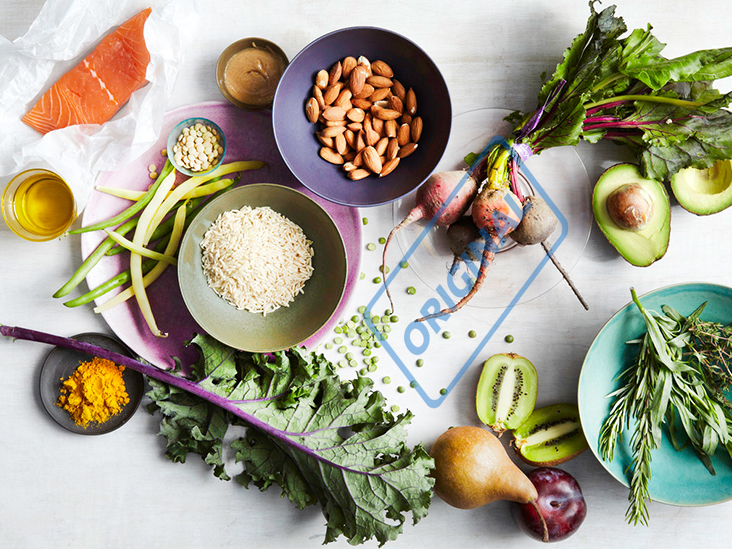

In [ ]:
watermarked_img.paste(watermark, (0,0), watermark)
# watermarked_img.save('output.png')
watermarked_img

In [ ]:
# for base img
transform = A.ReplayCompose([
    A.RandomCrop(500, 500),
    A.Rotate(),
    A.RandomBrightnessContrast(p=0.2),

    A.OneOf([
        A.RGBShift(), 
        A.HueSaturationValue()
    ]),
])

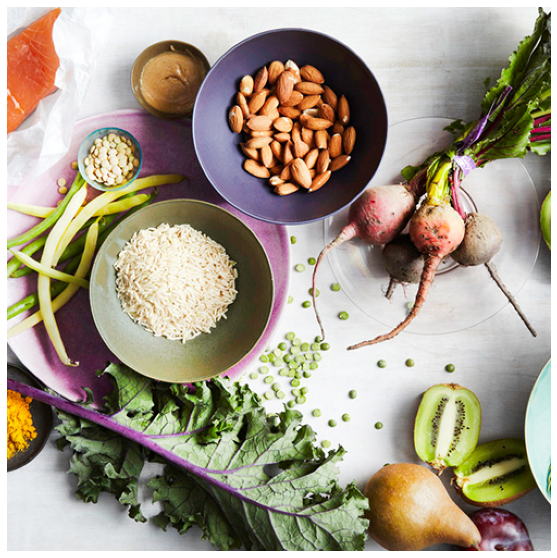

In [ ]:
data = transform(image=np.array(free_img))
visualize(data['image'])

In [ ]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.GaussNoise(),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.1),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])

RuntimeError: You are trying to use a deprecated augmentation 'IAAPiecewiseAffine' which depends on the imgaug library, but imgaug is not installed.

There are two options to fix this error:
1. [Recommended]. Switch to the Albumentations' implementation of the augmentation with the same API: PiecewiseAffine - https://albumentations.ai/docs/api_reference/augmentations/geometric/transforms/#albumentations.augmentations.geometric.transforms.PiecewiseAffine
2. Install a version of Albumentations that contains imgaug by running 'pip install -U albumentations[imgaug]'.

In [ ]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.3),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])

In [ ]:
transform = A.Compose([
     A.Affine(scale=(0.7,1.), translate_percent=(-0.25, 0.25), rotate=(-180, 180), shear=(-25,25), interpolation=cv2.INTER_LINEAR, p=0.7),
])

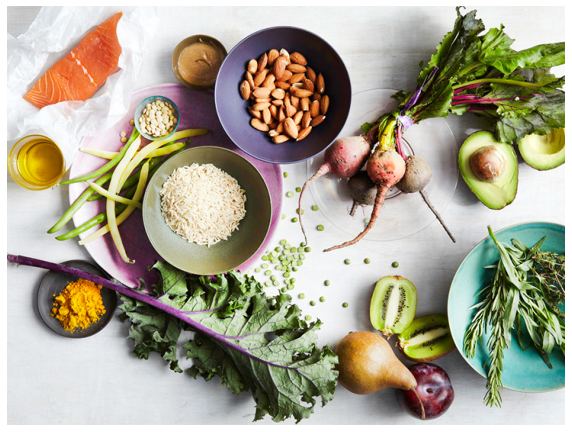

In [ ]:
data = transform(image=np.array(free_img))
visualize(data['image'])

In [ ]:
transform = A.Compose([
    A.Perspective()
])

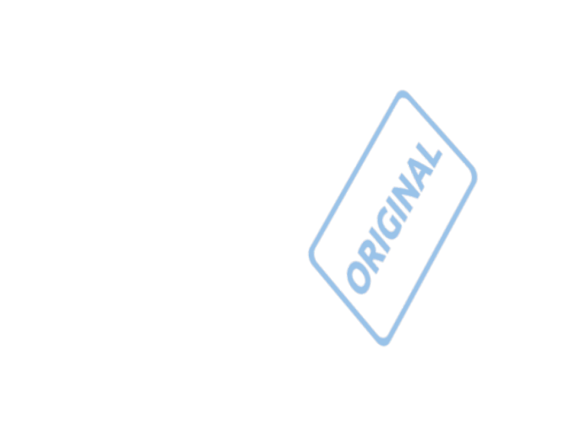

In [ ]:
data = transform(image=np.array(watermark))
visualize(data['image'])

In [ ]:
from PIL import Image
import numpy as np
import cv2
import os.path as osp
import os
import sys
import torch
from torchvision import datasets, transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
import random
from PIL import ImageEnhance

# Outputs

In [ ]:
import matplotlib.pyplot as plt
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)
    plt.savefig('Transformations.jpg')

In [ ]:
free_img = Image.open('datasets/custom_dataset/train/Watermark_free_image/1.png')
watermark = Image.open('datasets/custom_dataset/train/Mask/3.png')
watermark = watermark.resize(free_img.size)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/custom_dataset/train/Watermark_free_image/1.png'

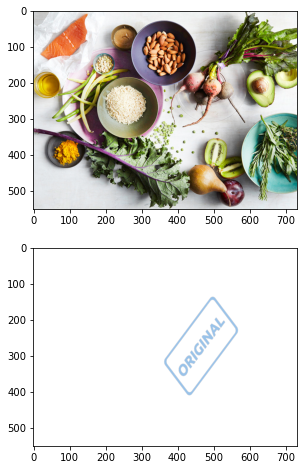

In [ ]:
visualize(free_img, watermark)

In [ ]:
base_img_transformations = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.3),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.RandomBrightnessContrast(), 
            A.ColorJitter(brightness=(0.5,1.1), contrast=0.4, saturation=0.4, hue=0.05),           
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
        A.Resize(free_img.size[1],free_img.size[0], interpolation=cv2.INTER_LINEAR),
        ])

watermark_transformation = A.Compose([
            A.GridDistortion(p=0.3),
            A.Flip(),
            A.RandomRotate90(),
            A.ElasticTransform(alpha=1, sigma=50, alpha_affine=150, approximate=True, same_dxdy=True, p=0.6),
            A.Sharpen(p=0.4),
            A.RandomBrightnessContrast(),            
            A.OneOf([
                A.MotionBlur(p=.2),
                A.MedianBlur(blur_limit=3, p=0.3),
                A.Blur(blur_limit=3, p=0.1),
            ], p=0.2),
            A.Perspective(),
            A.Resize(free_img.size[1],free_img.size[0], interpolation=cv2.INTER_LINEAR),
        ])

NameError: name 'free_img' is not defined

In [ ]:
base_img_trasnformed = base_img_transformations(image =np.array(free_img))
watermark_transformed = watermark_transformation(image =np.array(watermark))
base_img_trasnformed = base_img_trasnformed['image']
watermark_transformed = watermark_transformed['image']
visualize(base_img_trasnformed, watermark_transformed, free_img, watermark)


NameError: name 'base_img_transformations' is not defined

In [ ]:
print(type(base_img_trasnformed), type(free_img))

NameError: name 'base_img_trasnformed' is not defined

In [ ]:
watermark_transformed.shape ,base_img_trasnformed.shape

NameError: name 'watermark_transformed' is not defined

In [10]:
img=Image.fromarray(base_img_trasnformed)
img

NameError: name 'base_img_trasnformed' is not defined

In [11]:
wm = Image.fromarray(watermark_transformed)
wm

NameError: name 'watermark_transformed' is not defined

0.4166735022371866


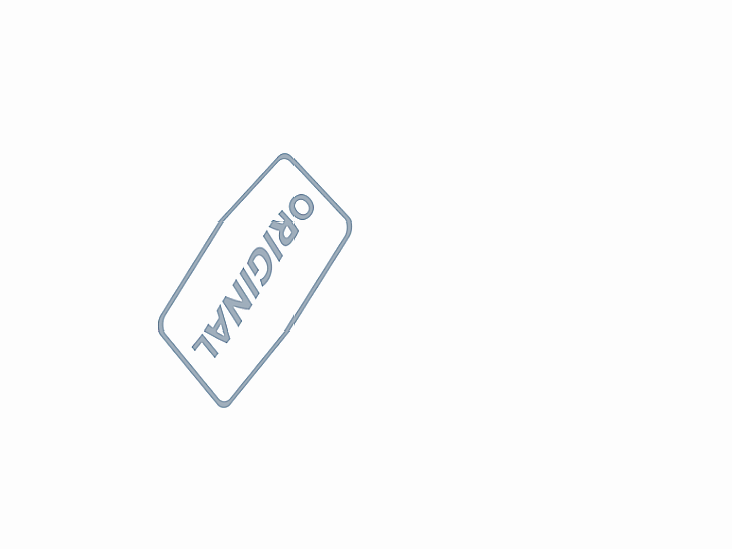

In [110]:
import random
factor =random.uniform(0.00, 1.00)
print(factor)
enhancer= ImageEnhance.Brightness(wm)
im_output = enhancer.enhance(factor)
im_output

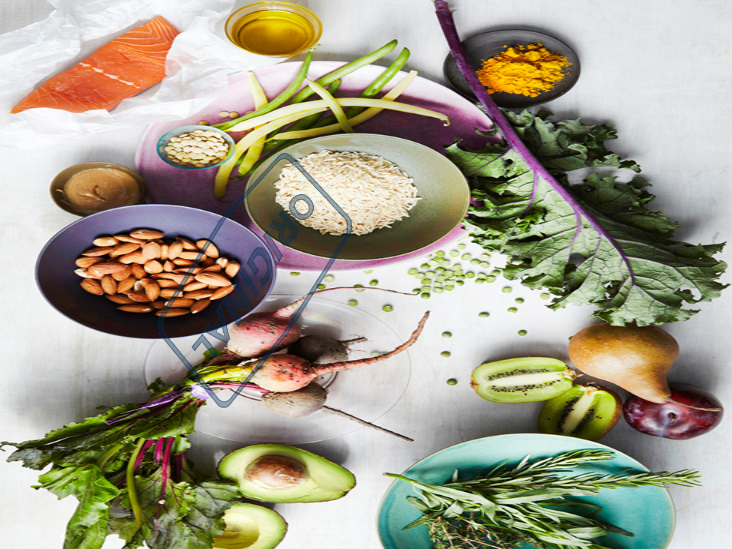

In [111]:
# wm = Image.fromarray(watermark_transformed)
img_pasted = img.copy()
img_pasted.paste(im_output,(0,0), im_output)
# img_pasted.save('output.png')
img_pasted

# Pytorch Dataloader

In [27]:
class CustomDatasetDataLoader(torch.utils.data.Dataset):
    def __init__(self ,is_train,dataset_dir,img_size):
        super().__init__()
        self.img_size = img_size 

        if is_train == True:
            self.root = dataset_dir + '/train/'
        elif is_train == False:
            self.root = dataset_dir + '/test/' 

        self.base_img_path=osp.join(self.root,'Watermark_free_image','%s.jpg') # watermark free image
        # print("base ",self.base_img_path)
        self.watermarks_path=osp.join(self.root,'Mask') # watermark mask
        # self.watermarked_img_path = osp.join(self.root,'Mask','*')

        # Transformations
        self.base_img_transformations = A.Compose([
        A.Flip(),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.3),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.RandomBrightnessContrast(), 
            A.ColorJitter(brightness=(0.5,1.1), contrast=0.4, saturation=0.4, hue=0.05),           
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
        # A.Resize(self.img_size, self.img_size, interpolation=cv2.INTER_LINEAR),
        ])

        self.watermark_transformation = A.Compose([
            A.GridDistortion(p=0.3),
            A.Flip(),
            A.ElasticTransform(alpha=1, sigma=50, alpha_affine=150, approximate=True, same_dxdy=True, p=0.6),
            A.Sharpen(p=0.4),
            A.RandomBrightnessContrast(),            
            A.OneOf([
                A.MotionBlur(p=.2),
                A.MedianBlur(blur_limit=3, p=0.3),
                A.Blur(blur_limit=3, p=0.1),
            ], p=0.2),
            A.Affine(scale=(0.8,1.), translate_percent=(-0.10, 0.10), rotate=(-30, 30), shear=(-10,10), interpolation=cv2.INTER_LINEAR),
            A.Perspective(),
            # A.Resize(self.img_size, self.img_size, interpolation=cv2.INTER_LINEAR),
        ])

        self.ids = list()
        for file in os.listdir(self.root+'/Watermark_free_image'):
            self.ids.append(file.strip('.jpg'))

    def __getitem__(self, index):

        img_id = self.ids[index]
        base_img = cv2.imread(self.base_img_path%img_id)
        
        # print("base Img read :",self.base_img_path%img_id)
        base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)

        # display(Image.fromarray(base_img))
        base_img_transformed = self.base_img_transformations(image=base_img)
        # display(      base_img_transformed['image']))

        files=os.listdir(self.watermarks_path)
        # watermark_img_name=random.choice(files)
        # print(watermark_img_name)
        watermark_img_name = 'Comp 2_00272.png'
        watermark_img_path = os.path.join(self.watermarks_path,watermark_img_name)
        watermark = Image.open(watermark_img_path)

        watermark = watermark.resize((base_img.shape[1],base_img.shape[0]))

        watermark_transformed = self.watermark_transformation(image =np.array(watermark))

        watermarked_image = Image.fromarray(base_img_transformed['image'])

        watermark_transformed = Image.fromarray(watermark_transformed['image'])

        # mask part _______________
        wmnp = np.array(watermark_transformed)
        mask = np.sum(wmnp,axis=2)>0
        final_mask = np.uint8(mask*255)
        
        factor =random.uniform(0.00, 1.00)
        
        enhancer= ImageEnhance.Brightness(watermark_transformed)
        enhanced_wm = enhancer.enhance(factor)
        
        watermarked_image.paste(enhanced_wm,(0,0), enhanced_wm)
        # display(watermarked_image)

        
        watermarked_image = np.array(watermarked_image)
        watermark = np.array(watermark_transformed)


        aug_base_img = base_img_transformed['image']
        
        return aug_base_img , watermark , watermarked_image , final_mask

    def __len__(self):
        return len(self.ids)

In [28]:
dataset = CustomDatasetDataLoader(True,'datasets/custom_dataset', 1080)

In [29]:
len(dataset)

5000

In [15]:
type(aug_base_img)

NameError: name 'aug_base_img' is not defined

In [16]:
from tqdm import tqdm
for i in tqdm(range(10)):
    aug_base_img , watermark , watermarked_image , final_mask =dataset[1]



100%|██████████| 10/10 [00:01<00:00,  6.31it/s]


In [35]:
aug_base_img , watermark , watermarked_image , final_mask =dataset[297]

Comp 2_00272.png


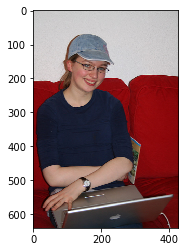

In [36]:
plt.imshow(aug_base_img, interpolation='nearest')
plt.show()

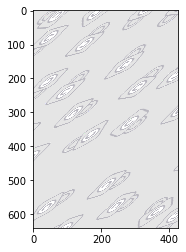

In [37]:
plt.imshow(watermark, interpolation='nearest')
plt.show()

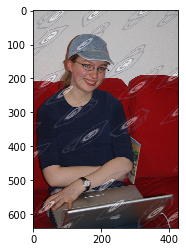

In [38]:
plt.imshow(watermarked_image, interpolation='nearest')
plt.show()

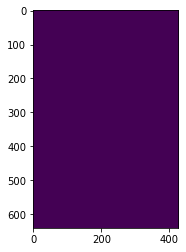

In [39]:
plt.imshow(final_mask, interpolation='nearest')
plt.show()

In [103]:
final_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

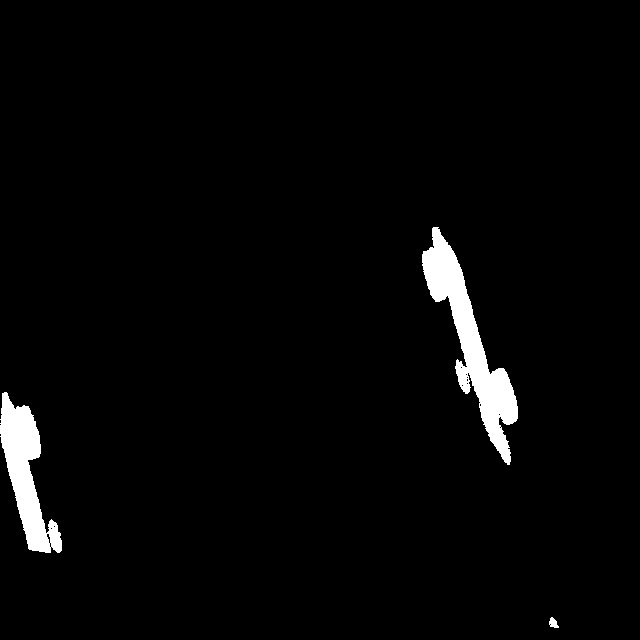

In [105]:
mm = Image.fromarray(final_mask,mode='L')
mm

In [66]:
z.shape

(1080, 1080, 3)

In [67]:
base_img = cv2.imread('datasets/custom_dataset/train/Watermark_free_image/1.png')

In [109]:
x.shape

(426, 640, 3)

In [110]:
base_img.shape[0:2]

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
base_img.size

1205604

In [24]:
free_img = Image.open('datasets/custom_dataset/train/Watermark_free_image/1.png')
watermark = Image.open('datasets/custom_dataset/train/Mask/Comp 1_00011.png')
watermark = watermark.resize(free_img.size)

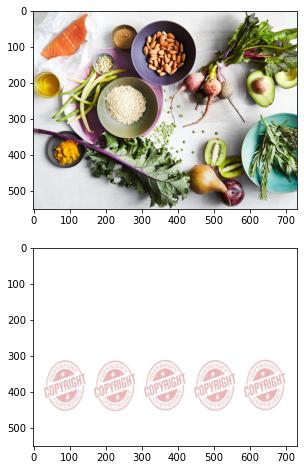

In [25]:
visualize(free_img, watermark)

In [26]:
def trans_paste(bg_img,fg_img,mask,box=(0,0)):
    fg_img_trans = Image.new("RGBA",bg_img.size)
    fg_img_trans.paste(fg_img,box,mask=mask)
    new_img = Image.alpha_composite(bg_img,fg_img_trans)
    return new_img,fg_img_trans

In [27]:
watermark
wmm = watermark.copy()
watermark.putalpha(random.randint(int(255*0.4),int(255*0.8))) # alpha

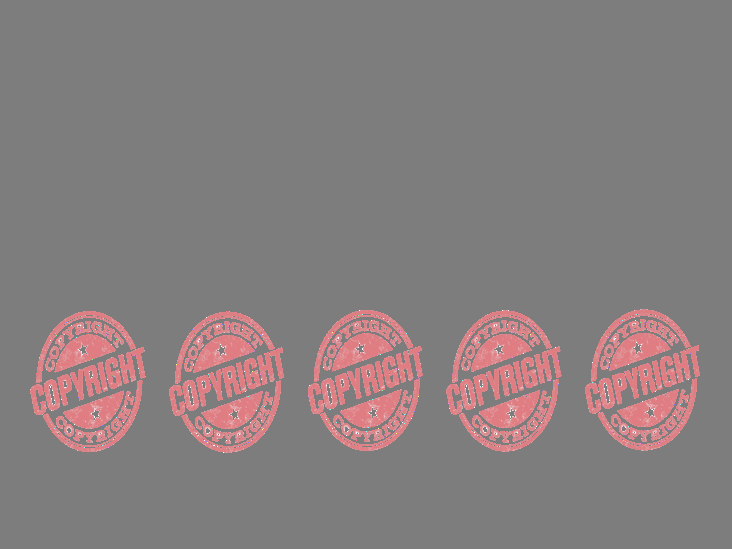

In [28]:
watermark

In [30]:
print(free_img.mode)

RGB


In [31]:
ims,wmc = trans_paste(free_img.convert('RGBA'),watermark,wmm)



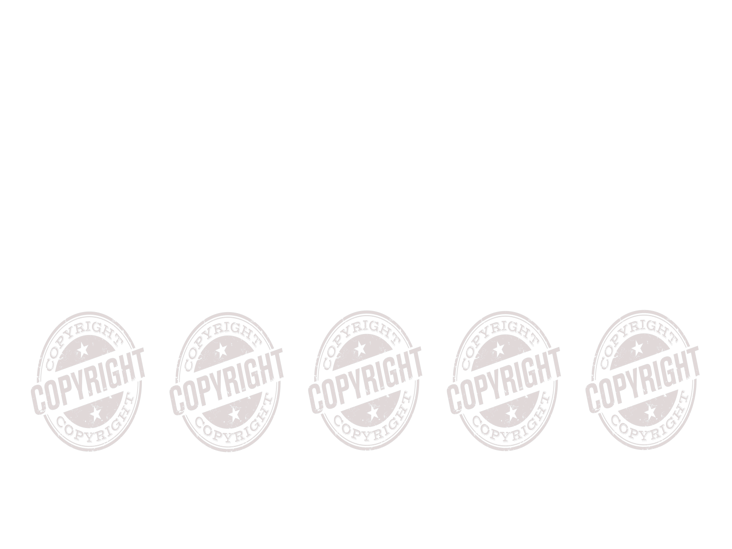

In [33]:
wmc

In [38]:
wmnp = np.array(wmc) # h,w,3
mask = np.sum(wmnp,axis=2)>0
print(mask)
mm = Image.fromarray(np.uint8(mask*255),mode='L')

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [39]:
wmnp

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

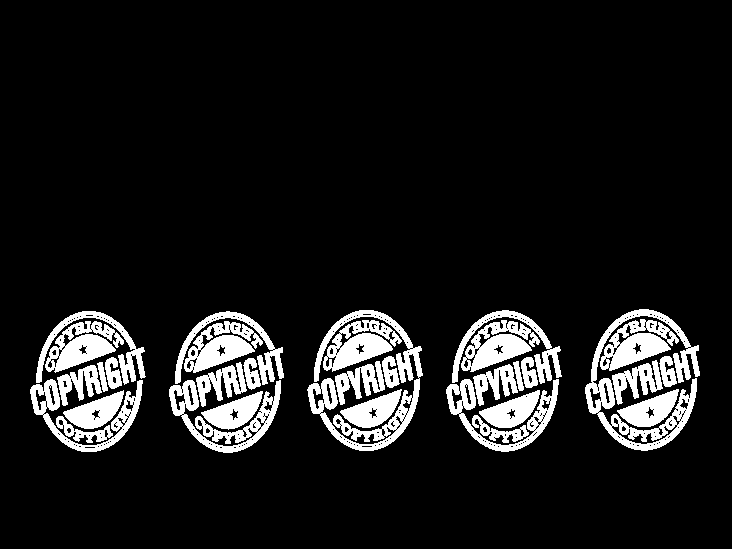

In [37]:
mm

In [ ]:
from PIL import Image, ImageEnhance
import numpy as np
import cv2
import os.path as osp
import os
import sys
import torch
from torchvision import datasets, transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2
import random
from tqdm import tqdm



class CustomDatasetDataLoader(torch.utils.data.Dataset):
    def __init__(self ,is_train,dataset_dir,img_size):
        super().__init__()
        self.img_size = img_size 

        if is_train == True:
            self.root = dataset_dir + '/train/'
        elif is_train == False:
            self.root = dataset_dir + '/test/' 

        mark='train'

        root_dataset='train2017'
        root_train='custom_clwd'

        self.img_path=osp.join(root_dataset) # coco dataset



        self.img_source_path=osp.join(root_train,mark,'Watermarked_image','%s.jpg') 

        self.img_target_path=osp.join(root_train,mark,'Watermark_free_image','%s.jpg')

        self.mask_path=osp.join(root_train,mark,'Mask','%s.png')

        self.W_path=osp.join(root_train,mark,'Watermark','%s.png')

        self.base_img_path=osp.join('train2017','%s.jpg') # watermark free image

        # print("base ",self.base_img_path)
        self.watermarks_path='custom_dataset/Watermarks' # watermark mask


        # Transformations
        self.base_img_transformations = A.Compose([
        A.Flip(),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.3),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.RandomBrightnessContrast(), 
            A.ColorJitter(brightness=(0.5,1.1), contrast=0.4, saturation=0.4, hue=0.05),           
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
        # A.Resize(self.img_size, self.img_size, interpolation=cv2.INTER_LINEAR),
        ])

        self.watermark_transformation = A.Compose([
            A.GridDistortion(p=0.3),
            A.Flip(),
            A.ElasticTransform(alpha=1, sigma=50, alpha_affine=150, approximate=True, same_dxdy=True, p=0.6),
            A.Sharpen(p=0.4),
            A.RandomBrightnessContrast(),            
            A.OneOf([
                A.MotionBlur(p=.2),
                A.MedianBlur(blur_limit=3, p=0.3),
                A.Blur(blur_limit=3, p=0.1),
            ], p=0.2),
            A.Affine(scale=(0.8,1.), translate_percent=(-0.10, 0.10), rotate=(-30, 30), shear=(-10,10), interpolation=cv2.INTER_LINEAR),
            A.Perspective(),
            # A.Resize(self.img_size, self.img_size, interpolation=cv2.INTER_LINEAR),
        ])

        self.ids = list()
        for file in os.listdir(root_dataset):
            self.ids.append(file.strip('.jpg'))

    def __getitem__(self, index):

        img_id = self.ids[index]
        base_img = cv2.imread(self.base_img_path%img_id)
        
        # print("base Img read :",self.base_img_path%img_id)
        base_img = cv2.cvtColor(base_img, cv2.COLOR_BGR2RGB)

        # display(Image.fromarray(base_img))
        base_img_transformed = self.base_img_transformations(image=base_img)
        # display(      base_img_transformed['image']))

        files=os.listdir(self.watermarks_path)
        watermark_img_name=random.choice(files)
        watermark_img_path = os.path.join(self.watermarks_path,watermark_img_name)
        watermark = Image.open(watermark_img_path)

        watermark = watermark.resize((base_img.shape[1],base_img.shape[0]))

        watermark_transformed = self.watermark_transformation(image =np.array(watermark))

        watermarked_image = Image.fromarray(base_img_transformed['image'])

        watermark_transformed = Image.fromarray(watermark_transformed['image'])

        # mask part _______________
        wmnp = np.array(watermark_transformed)
        mask = np.sum(wmnp,axis=2)>0
        final_mask = np.uint8(mask*255)
        
        factor =random.uniform(0.00, 1.00)
        
        enhancer= ImageEnhance.Brightness(watermark_transformed)
        enhanced_wm = enhancer.enhance(factor)
        
        watermarked_image.paste(enhanced_wm,(0,0), enhanced_wm)
        # display(watermarked_image)

        
        watermarked_image = np.array(watermarked_image)
        watermark = np.array(watermark_transformed)


        aug_base_img = base_img_transformed['image']

        # Saving all Images
        pil_aug = Image.fromarray(aug_base_img)
        pil_watermark =Image.fromarray(watermark)
        pil_watermarked_image = Image.fromarray(watermarked_image)
        pil_final_mask =Image.fromarray(final_mask)

        pil_aug.save(self.img_target_path%img_id)

        pil_watermark.save(self.W_path%img_id)

        pil_watermarked_image.save(self.img_source_path%img_id)

        pil_final_mask.save(self.mask_path%img_id)
        
        return aug_base_img , watermark , watermarked_image , final_mask

    def __len__(self):
        return len(self.ids)


dataset = CustomDatasetDataLoader(True,'datasets/custom_dataset', 1080)

for i in tqdm(range(60000,60165)):
    aug_base_img , watermark , watermarked_image , final_mask =dataset[i]